5. Weather, Road Conditions, and External Factors  


In [ ]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import LabelEncoder
import gc

<hr style="border: 1px solid #ccc; margin: 20px 0;">

**•	How does weather affect accident rates?**


Top 5 Weather Conditions for Severity Level 1:
Weather_Condition
Fair             34359
Mostly Cloudy    10676
Cloudy            7985
Partly Cloudy     6820
Light Rain        2338
Name: count, dtype: int64[pyarrow]


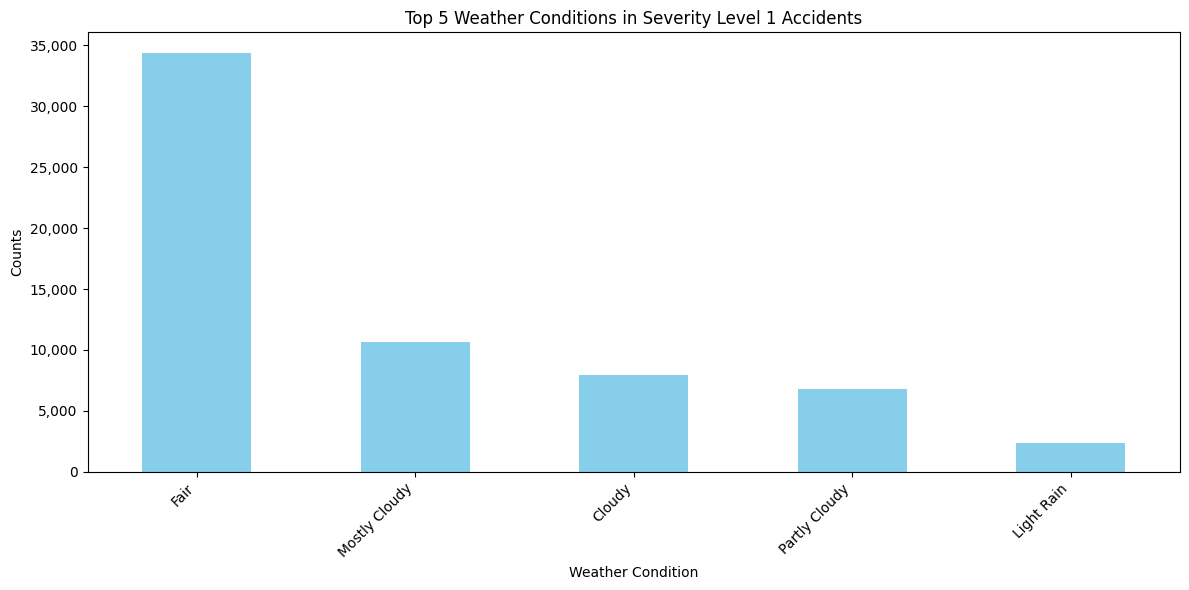

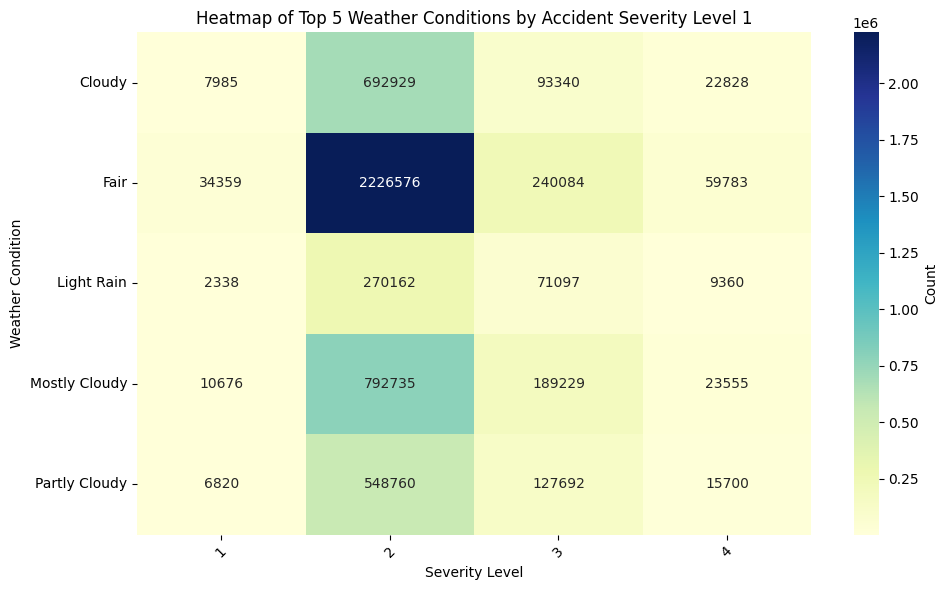

Top 5 Weather Conditions for Severity Level 2:
Weather_Condition
Fair             2226576
Mostly Cloudy     792735
Cloudy            692929
Partly Cloudy     548760
Clear             536971
Name: count, dtype: int64[pyarrow]


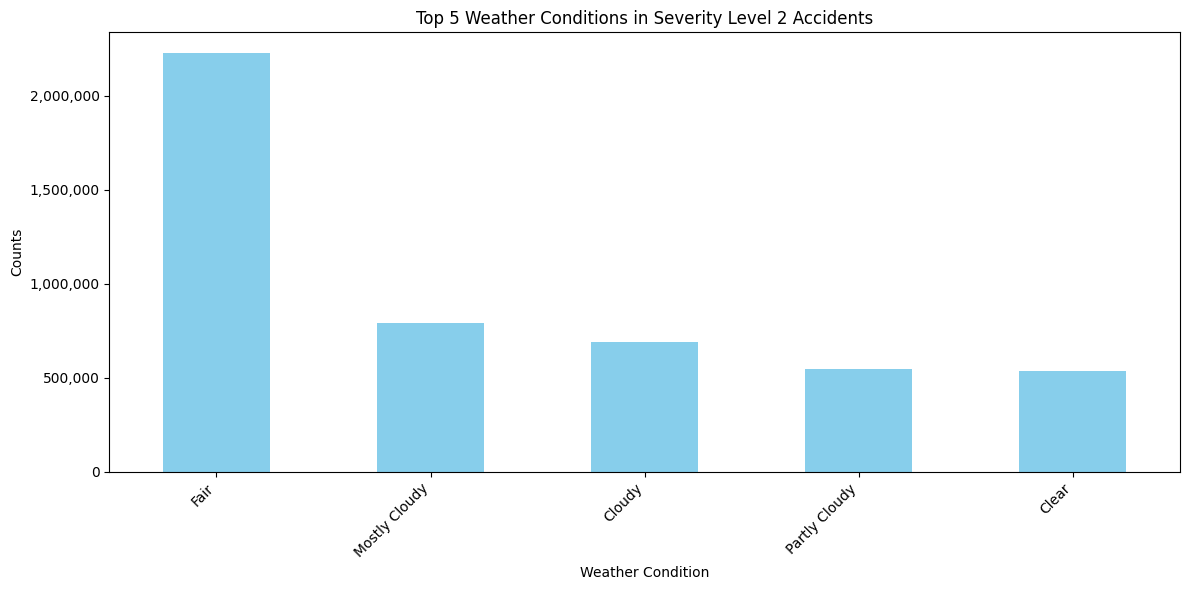

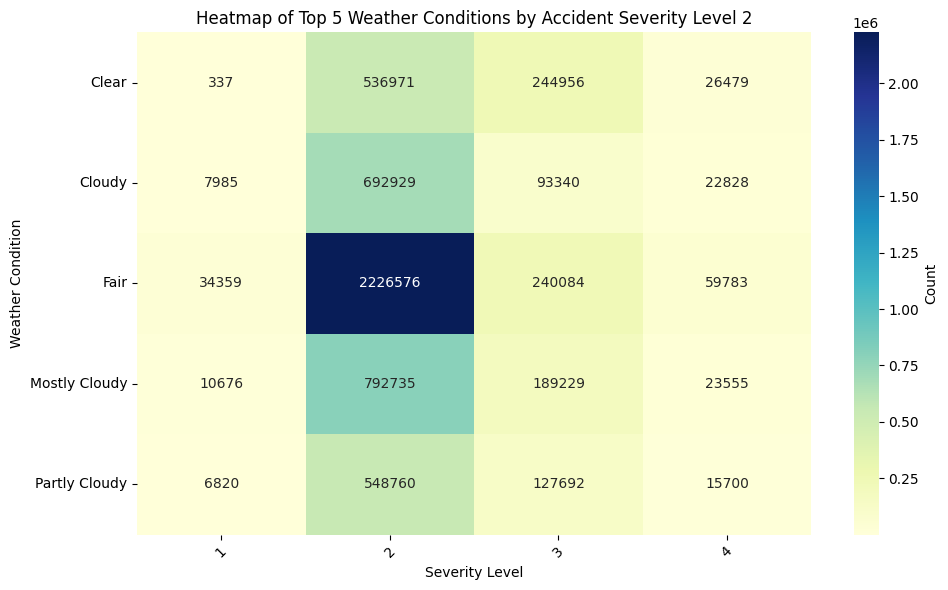

Top 5 Weather Conditions for Severity Level 3:
Weather_Condition
Clear            244956
Fair             240084
Mostly Cloudy    189229
Partly Cloudy    127692
Overcast         119946
Name: count, dtype: int64[pyarrow]


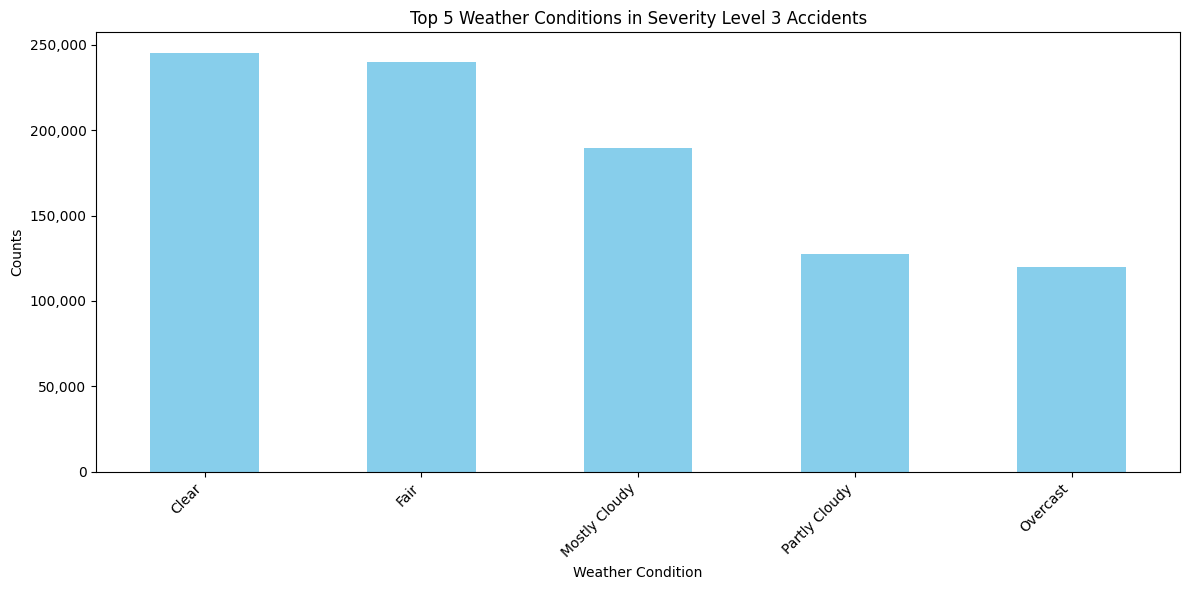

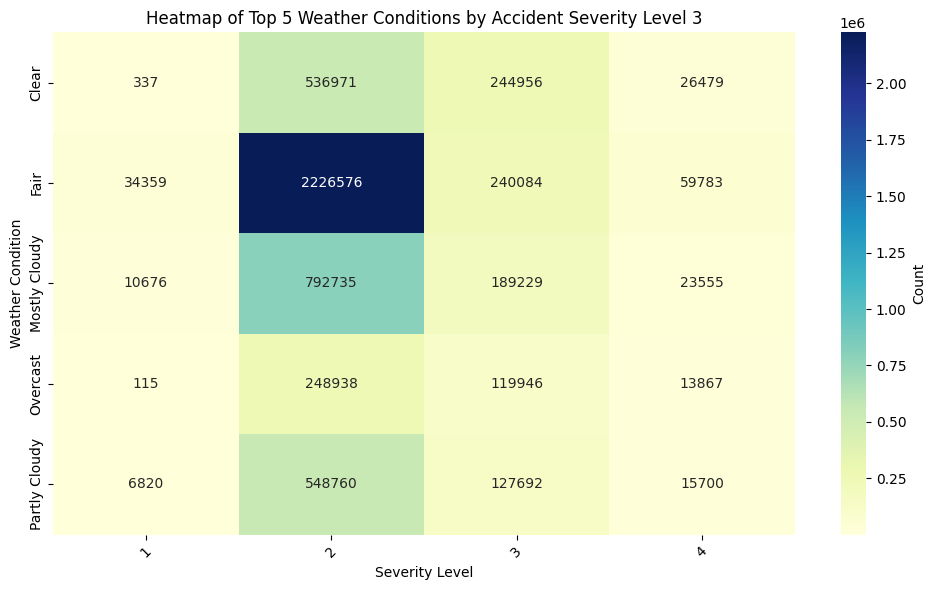

Top 5 Weather Conditions for Severity Level 4:
Weather_Condition
Fair             59783
Clear            26479
Mostly Cloudy    23555
Cloudy           22828
Partly Cloudy    15700
Name: count, dtype: int64[pyarrow]


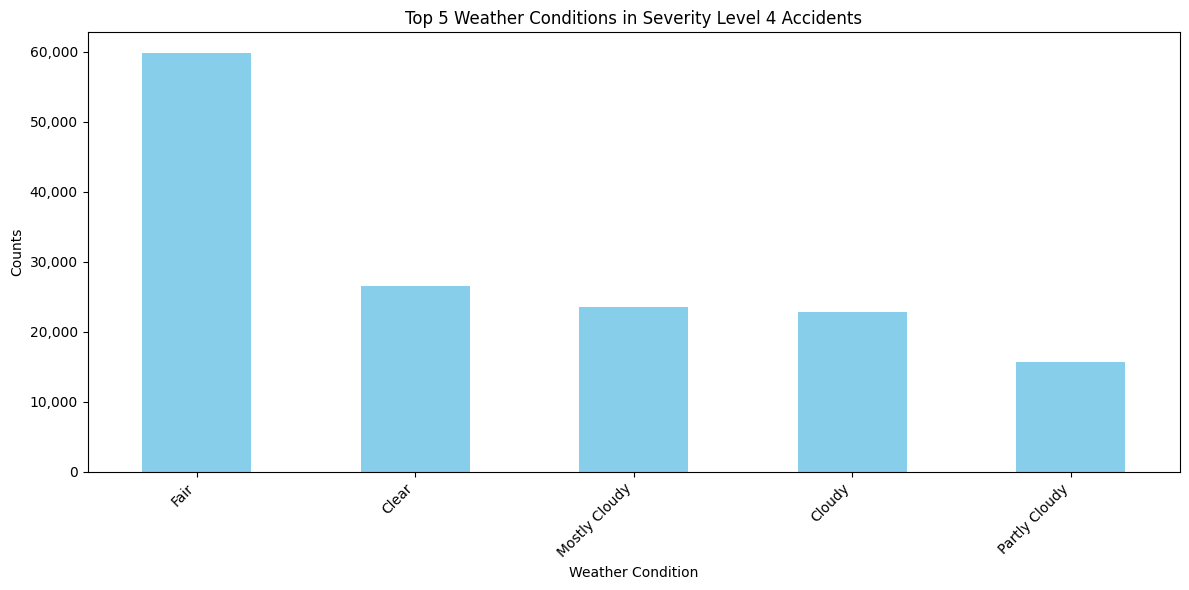

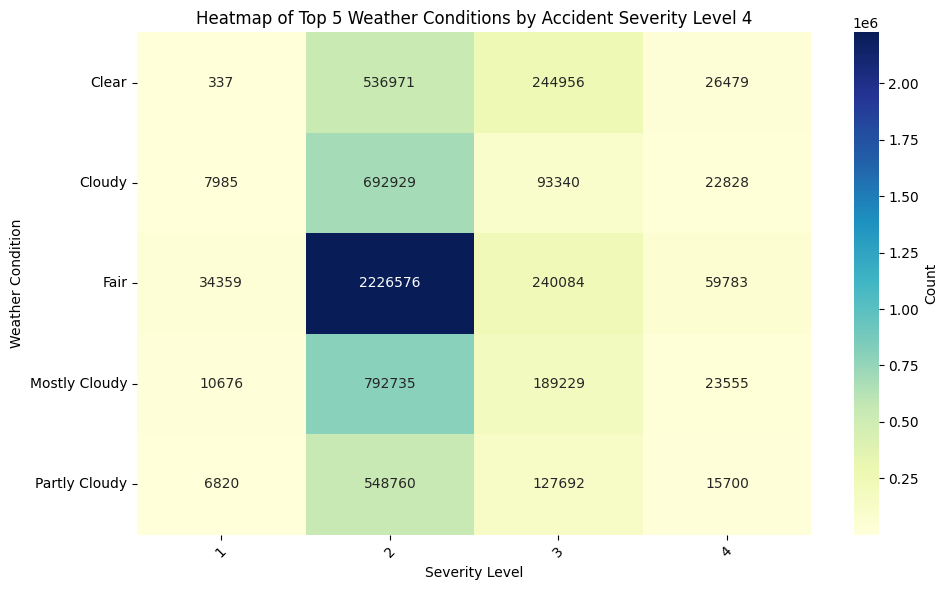

Correlation Matrix:
                            Severity  Weather_Condition_Encoded
Severity                   1.000000                   0.067452
Weather_Condition_Encoded  0.067452                   1.000000


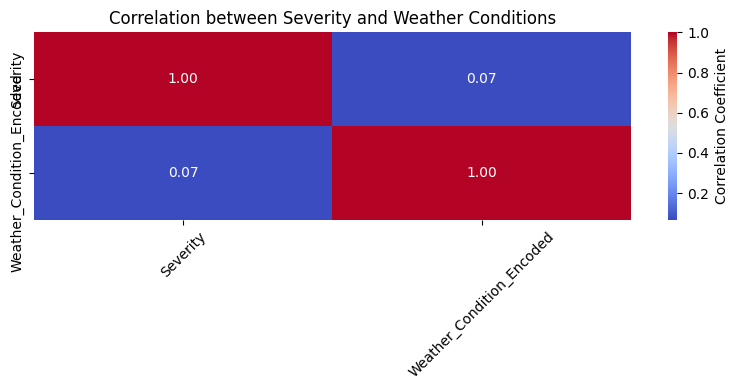

In [7]:


# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Filter relevant columns
df_filtered = df[['Severity', 'Weather_Condition']].dropna()

# Compute the filtered DataFrame
df_filtered = df_filtered.compute()

# Encode the 'Weather_Condition' using Label Encoding
label_encoder = LabelEncoder()
df_filtered['Weather_Condition_Encoded'] = label_encoder.fit_transform(df_filtered['Weather_Condition'])

# Loop through each severity level from 1 to 4
for severity in range(1, 5):
    # Filter the DataFrame for the current severity level
    df_severity = df_filtered[df_filtered['Severity'] == severity]

    # Count occurrences of each weather condition
    severity_counts = df_severity['Weather_Condition'].value_counts()
    total_severity = severity_counts.sum()  # Total count of weather conditions
    nan_count = df_severity['Weather_Condition'].isna().sum()  # Count of NaN values

    # Get the top 5 weather conditions
    top_5_severity = severity_counts.nlargest(5)
    print(f"Top 5 Weather Conditions for Severity Level {severity}:\n{top_5_severity}")

    # Plotting the bar chart for top 5 weather conditions
    plt.figure(figsize=(12, 6))
    top_5_severity.plot(kind='bar', color='skyblue')

    # Formatting the bar plot
    plt.title(f'Top 5 Weather Conditions in Severity Level {severity} Accidents')
    plt.xlabel('Weather Condition')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis as integer
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

    # Prepare data for heatmap
    # Filter the DataFrame to include only the current severity level and top 5 weather conditions
    df_top5 = df_filtered[df_filtered['Weather_Condition'].isin(top_5_severity.index)]

    # Create a pivot table to count occurrences of each weather condition by severity
    pivot_table = pd.crosstab(df_top5['Weather_Condition'], df_top5['Severity'])

    # Generate the heatmap for top 5 weather conditions by severity
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
    plt.title(f'Heatmap of Top 5 Weather Conditions by Accident Severity Level {severity}')
    plt.xlabel('Severity Level')
    plt.ylabel('Weather Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Calculate the correlation matrix for severity and encoded weather conditions
correlation_matrix = df_filtered[['Severity', 'Weather_Condition_Encoded']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between Severity and Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<hr style="border: 1px solid #ccc; margin: 20px 0;">

**•	Do accidents increase during specific holidays or weekends?**

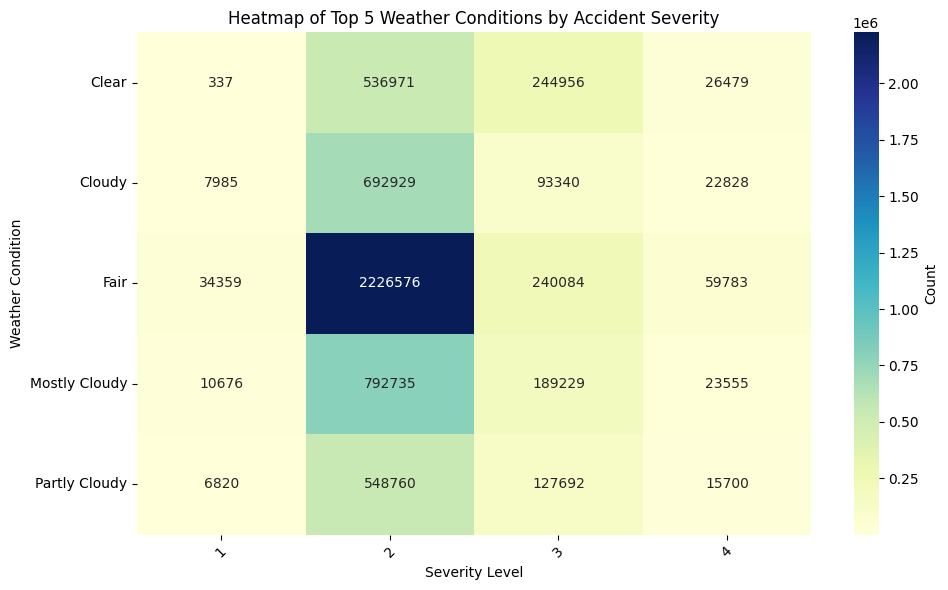

In [8]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Filter for relevant columns
df_filtered = df[['Severity', 'Weather_Condition']]

# Drop rows with NaN values in the filtered DataFrame
df_filtered = df_filtered.dropna()

# Compute the filtered DataFrame
df_filtered = df_filtered.compute()

# Count occurrences of each weather condition
weather_counts = df_filtered['Weather_Condition'].value_counts()

# Get the top 5 weather conditions
top_5_weather = weather_counts.head(5).index

# Filter the DataFrame to include only the top 5 weather conditions
df_top5 = df_filtered[df_filtered['Weather_Condition'].isin(top_5_weather)]

# Create a pivot table to count occurrences of each weather condition by severity
pivot_table = pd.crosstab(df_top5['Weather_Condition'], df_top5['Severity'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Top 5 Weather Conditions by Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()